In [1]:
import scapy as scapy
from scapy.utils import PcapReader
from scapy import layers
import time
import os
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass

In [2]:
@dataclass
class INTOption:
    kind: int
    length: int
    switch_id: int
    latency_ns: int

In [3]:
LOG = True

In [4]:
DUMP_DIRECTORY = "./tcpdump_logs/"
# PCAP_FILE = DUMP_DIRECTORY + "dlint_1_flow/5mbps.pcap"
PCAP_FILE = DUMP_DIRECTORY + "forw_1_flow/5mbps.pcap"

assert os.path.exists(PCAP_FILE), "The path to the pcap file is incorrect."

In [5]:
pcap = PcapReader(PCAP_FILE)

options = []

for index, pkt in enumerate(pcap):
    pkt: scapy.packet.Packet

    if pkt.haslayer(layers.inet.TCP):
        for option in pkt.getlayer(layers.inet.TCP).options:
            if option[0] == 114:
                values = ''.join([hex(x)[2:].zfill(2) for x in option[1]])
                kind = int(values[0:2], base=16)
                length = int(values[2:4], base=16)
                switch_id = int(values[4:12], base=16)
                latency = int(values[12:20], base=16)
                if values[20:]:
                    print(f"ERROR: There are more bytes than expected in the option. {values}")
                    exit(1)

                if latency == 0:
                    continue

                options.append(INTOption(kind, length, switch_id, latency))

                if index % 500 == 0:
                    print(f"Processed {index} packets.")

            if index == 20:
                break

Processed 500 packets.
Processed 1000 packets.
Processed 1500 packets.
Processed 2000 packets.
Processed 2500 packets.
Processed 3000 packets.
Processed 3500 packets.
Processed 4000 packets.
Processed 4500 packets.
Processed 5000 packets.
Processed 5500 packets.
Processed 6000 packets.
Processed 6500 packets.
Processed 7000 packets.
Processed 7500 packets.
Processed 8000 packets.
Processed 8500 packets.
Processed 9000 packets.
Processed 9500 packets.
Processed 10000 packets.
Processed 10500 packets.
Processed 11000 packets.
Processed 11500 packets.
Processed 12000 packets.
Processed 12500 packets.
Processed 13000 packets.
Processed 13500 packets.
Processed 14000 packets.
Processed 14500 packets.
Processed 15000 packets.
Processed 15500 packets.
Processed 16000 packets.
Processed 16500 packets.
Processed 17000 packets.
Processed 17500 packets.
Processed 18000 packets.
Processed 18500 packets.
Processed 19000 packets.
Processed 19500 packets.
Processed 20000 packets.
Processed 20500 pack

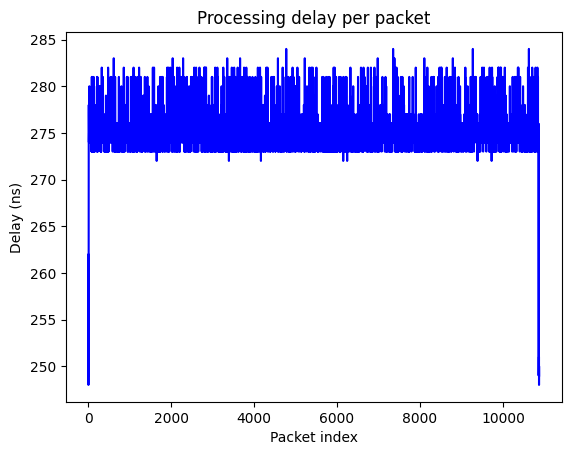

In [6]:
delays = np.array([option.latency_ns for option in options])
plt.plot(delays, color='blue', linestyle='solid')
plt.ylabel('Delay (ns)')
plt.xlabel('Packet index')
plt.title('Processing delay per packet')

plt.show()

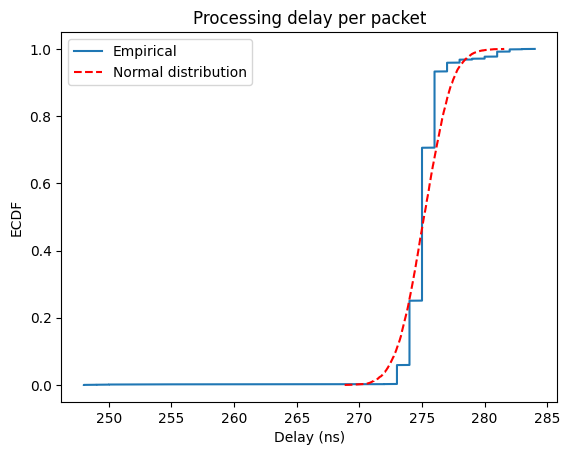

In [8]:
# Create ECDF plot
x = np.sort(delays)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, label='Empirical')
plt.ylabel('ECDF')
plt.xlabel('Delay (ns)')
plt.title('ECDF Processing delay per packet')

mean = np.mean(delays)
std = np.std(delays)
standard_dist = np.random.normal(mean, std, len(delays))
x = np.sort(standard_dist)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, color='red', linestyle='--', label='Normal distribution')

plt.legend()
plt.show()